In [1]:
from pynq import Overlay
import pynq.lib.dma

# Load the overlay
#overlay = Overlay('/home/xilinx/jupyter_notebooks/PDI_Stream_v2/design_1.bit')
#overlay = Overlay('/home/xilinx/resizer.bit')
overlay = Overlay('../bitstream/design_1.bit')

overlay.ip_dict

# Load the FIR DMA
dma = overlay.axi_dma_0
dma

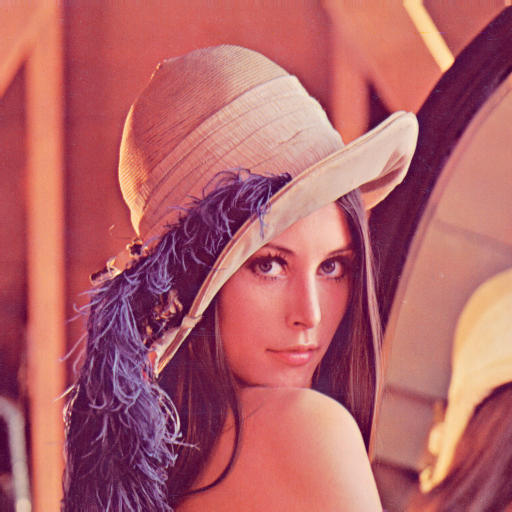

In [11]:
from PIL import Image

arquivo = Image.open("../images/lena.jpg")
imagem = arquivo.load()

largura, altura = arquivo.size
display(arquivo)

In [12]:
import numpy as np
from pynq import Xlnk

# Number of samples
qtdValoresEnviados = (largura*altura)*3 #todos os pixeis e a quantidade de elementos que cada pixel vai possuir
#qtdValoresEsperados = qtdValoresEnviados*4 
qtdValoresEsperados = (largura*altura)

input_array = np.array(imagem)

# Allocate buffers for the input and output signals
xlnk = Xlnk()

in_buffer = xlnk.cma_array(shape=(qtdValoresEnviados,), dtype=np.int32)
out_buffer = xlnk.cma_array(shape=(qtdValoresEsperados,), dtype=np.int32)


In [13]:

#in_buffer = xlnk.cma_array(shape=(altura, largura, 3), dtype=np.uint8, cacheable=1)
#out_buffer = xlnk.cma_array(shape=(altura, largura, 1), dtype=np.uint8, cacheable=1)


print('Buffer in before receive from DMA')

#in_buffer[0:altura*altura*3] = input_array

i = 0

for x in range(largura):
    for y in range(altura):
        R,G,B = imagem[x, y]
        in_buffer[i+0] = int(R)
        in_buffer[i+1] = int(G)
        in_buffer[i+2] = int(B)
        #print(f'RGB:{in_buffer[i],in_buffer[i+1],in_buffer[i+2]}')
        i = i+3
        
    
print('Buffer out before receive from DMA')

# for i in range(qtdValoresEsperados):
#    print(out_buffer[i])

    


Buffer in before receive from DMA
Buffer out before receive from DMA


In [14]:
NovaIgagem = Image.new('RGB', (largura, altura))
setarPixel = NovaIgagem.load()

In [15]:
# Trigger the DMA transfer and wait for the result
import time
start_time = time.time()

############
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
###########
stop_time = time.time()

In [16]:
hw_exec_time = stop_time-start_time
print('Hardware output: ',hw_exec_time)

cont = 0
#for i in range(0, qtdValoresEsperados): 
    #print(f'resultado recebido da operacao:{out_buffer[i]}')
     #if (cont == 3):
        #print(f'resultado recebido da operacao:{out_buffer[i]}')
        #print('-----')
        
        #cont = 0
    #else:
        #if (cont == 0):
            #print(f'R:{out_buffer[i]}')
        #elif (cont == 1):
        #    print(f'G:{out_buffer[i]}')
        #else:
        #    print(f'B:{out_buffer[i]}')
    
    #cont = cont+1

indice = 0
#nova_largura = int(largura/3)
#nova_altura = int(altura/3)
for x in range(largura):
    for y in range(altura):
        setarPixel[x, y] = (int(out_buffer[indice]), int(out_buffer[indice]), int(out_buffer[indice]))
        indice = indice+1
        
# Free the buffers
in_buffer.close()
out_buffer.close()

Hardware output:  0.014213085174560547


In [17]:
NovaIgagem.save('../images/LenaCinza.jpg')

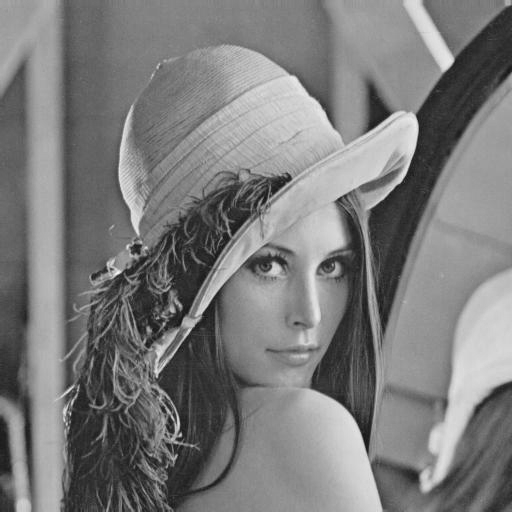

In [18]:
display(NovaIgagem)